## Data Exploration

In [37]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.preprocessing import StandardScaler


In [2]:
# import dataset
bike_dataset = pd.read_csv("BIKE DETAILS.csv")

In [3]:
# check first 5 rows
bike_dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
# check last 5 rows
bike_dataset.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [5]:
# check number of rows and columns of dataset
bike_dataset.shape

(1061, 7)

In [6]:
# check product of number of rows and columns of dataset
bike_dataset.size

7427

In [7]:
# check the columns
bike_dataset.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [8]:
# check the information
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## Data Cleaning

In [9]:
# check null values
bike_dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
# drop all null values
bike_dataset.dropna(inplace=True)

In [11]:
# recheck null values
bike_dataset.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [12]:
# check duplicate rows
bike_dataset.duplicated().sum()

4

In [13]:
# drop duplicate rows
bike_dataset.drop_duplicates(inplace=True)

In [14]:
# recheck shape
bike_dataset.shape

(622, 7)

## Data Encoding/ Pre-Processing


In [15]:
# check distribution of categorical data
print(bike_dataset.owner.value_counts())
print(bike_dataset.seller_type.value_counts())

1st owner    552
2nd owner     66
3rd owner      3
4th owner      1
Name: owner, dtype: int64
Individual    619
Dealer          3
Name: seller_type, dtype: int64


In [16]:
# encoding "Owner" Column
bike_dataset.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2, '4th owner':3}},inplace=True)

# encoding "Seller_Type" Column
bike_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

## LMS ALGORITHM


In [17]:
# split data into X and Y
X = bike_dataset.drop(['name','selling_price'],axis=1)
Y = bike_dataset['selling_price']

In [35]:
X

,year,seller_type,owner,km_driven,ex_showroom_price
2,2018,1,0,12000,148114.0
3,2015,1,0,23000,89643.0
5,2010,1,0,60000,53857.0
6,2018,1,0,17000,87719.0
9,2016,1,0,42000,60122.0
...,...,...,...,...,...
1056,2010,1,0,500000,52000.0
1057,2012,1,0,33000,51000.0
1058,2013,1,1,35000,57000.0
1059,2009,1,0,53000,58000.0


In [36]:
Y

2       150000
3        65000
5        18000
6        78500
9        50000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 622, dtype: int64

### SCALING

In [38]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [39]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size = 0.1, random_state=2)

In [40]:
def LMS_algorithm(X, y, learning_rate, epochs):
    m, n = X.shape  # Number of samples (m) and features (n)
    # Randomly initialize weights instead of zeros
    weights = np.random.randn(n) * 0.01  # Initialize small random weights

    bias = 0  # Initialize bias term
    mse_list = []  # List to store Mean Squared Error for each epoch

    # Training loop for LMS
    for epoch in range(epochs):
        y_pred = np.dot(X, weights) + bias  # Linear prediction (y = Xw + b)
        error = y_pred - y  # Error calculation (predicted - actual)

        # Update weights and bias using the LMS rule
        weights -= learning_rate * (1/m) * np.dot(X.T, error)
        bias -= learning_rate * (1/m) * np.sum(error)

        # Calculate Mean Squared Error (MSE)
        mse = (1/m) * np.sum(error ** 2)
        mse_list.append(mse)

    return weights, bias, mse_list

## Learning_rate = 0.001

In [51]:
learning_rate = 0.001  # Initial learning rate (step-size)
epochs = 5000  # Number of iterations

# Training the model using the LMS algorithm
weights, bias, mse_list = LMS_algorithm(X_train, Y_train, learning_rate, epochs)

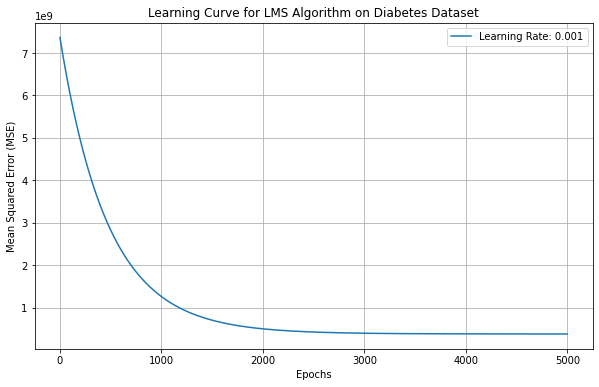

Weights: [14179.52334933   146.90454057 -2220.87944877  -766.49016538
 53739.47430851]
Bias: 59618.05221096964


In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), mse_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for LMS Algorithm on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Display the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

## learning_rate = 0.01

In [43]:
learning_rate = 0.01  # Initial learning rate (step-size)
epochs = 1000  # Number of iterations

# Training the model using the LMS algorithm
weights, bias, mse_list = LMS_algorithm(X_train, Y_train, learning_rate, epochs)

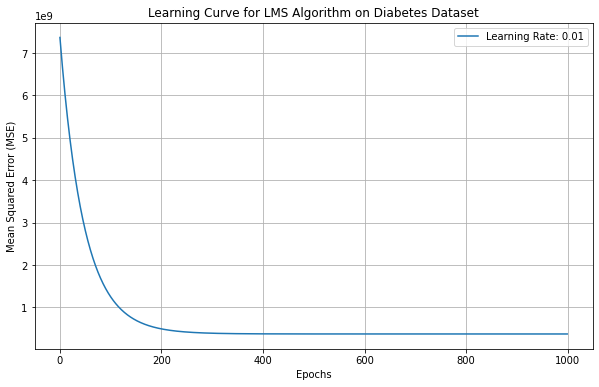

Weights: [14139.15503541  -330.65543094 -2425.12953016  -594.41087643
 54171.43731397]
Bias: 60040.54599617117


In [44]:
# Plotting the learning curve (MSE vs. epochs)
plt.figure(figsize=(10,6))
plt.plot(range(epochs), mse_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for LMS Algorithm on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Display the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

## learning_rate = 0.1

In [80]:
learning_rate = 0.1  # Initial learning rate (step-size)
epochs = 100  # Number of iterations

# Training the model using the LMS algorithm
weights, bias, mse_list = LMS_algorithm(X_train, Y_train, learning_rate, epochs)

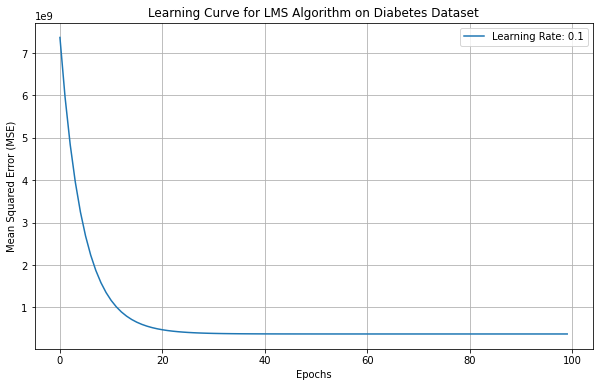

Weights: [14138.79568526  -336.21567659 -2426.30328992  -593.91582769
 54172.93707564]
Bias: 60041.86056145128


In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), mse_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for LMS Algorithm on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Display the final weights and bias
print("Weights:", weights)
print("Bias:", bias)

# ALL LEARNING RATES VIEWED TOGETHER

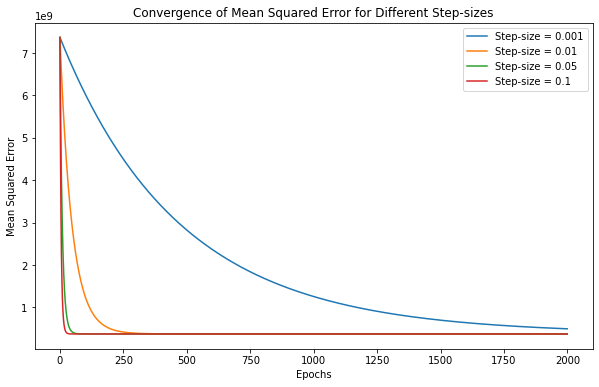

Test MSE for step-size 0.001: 3223041341.6338
Test MSE for step-size 0.01: 3222032345.8575
Test MSE for step-size 0.05: 3221948505.1300
Test MSE for step-size 0.1: 3221948505.1300


In [82]:
etas = [0.001, 0.01,  0.05, 0.1,]
epochs = 2000
weights = {}
errors = {}

# Training for different step-sizes
for eta in etas:
    W, bias, error_list = LMS_algorithm(X_train, Y_train, eta, epochs)
    weights[eta] = W
    errors[eta] = error_list

# Plot the convergence of error for each step-size
plt.figure(figsize=(10, 6))
for eta in etas:
    plt.plot(errors[eta], label=f'Step-size = {eta}')
plt.title('Convergence of Mean Squared Error for Different Step-sizes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate on test set
def evaluate(W, X_test, y_test):
    y_pred = np.dot(X_test, W)
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

# Evaluate each model with the test set
for eta in etas:
    W = weights[eta]
    test_mse = evaluate(W, X_test, Y_test)
    print(f'Test MSE for step-size {eta}: {test_mse:.4f}')

# BEST PERFORMING LEARNING RATES 0.05 AND 0.1

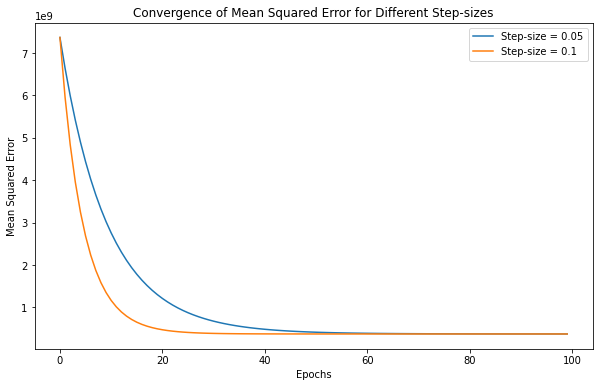

Test MSE for step-size 0.05: 3239031091.9992
Test MSE for step-size 0.1: 3225166472.3408


In [83]:
etas = [ 0.05, 0.1 ]
epochs = 100
weights = {}
errors = {}

# Training for different step-sizes
for eta in etas:
    W, bias, error_list = LMS_algorithm(X_train, Y_train, eta, epochs)
    weights[eta] = W
    errors[eta] = error_list

# Plot the convergence of error for each step-size
plt.figure(figsize=(10, 6))
for eta in etas:
    plt.plot(errors[eta], label=f'Step-size = {eta}')
plt.title('Convergence of Mean Squared Error for Different Step-sizes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Evaluate on test set
def evaluate(W, X_test, y_test):
    y_pred = np.dot(X_test, W)
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

# Evaluate each model with the test set
for eta in etas:
    W = weights[eta]
    test_mse = evaluate(W, X_test, Y_test)
    print(f'Test MSE for step-size {eta}: {test_mse:.4f}')